# Exploratory Data Analysis

I will explore the given data first. Main objectives here are
- understand the target distribution
    - what kind of words are belonging to the class?

## Summary of the analysis
From the data, some names are quite obvious to identify its class but some seems very difficult, especially classifying similar characteristic classes such as "Artist", "Athlete" and "OfficeHolder" would be challenging. Also those names include not only English but many other languages like German, Japanese, Spanish, etc. That also potentially makes this task difficult. From the wordcloud, we can see some characteristics of frequent words in each classes.

Furthermore, in "Film" and "WrittenWork", one of the most frequently appeared words is "film", which makes sense for "Film" class but very confusing for "WrittenWork". If classifying those classes are difficult because of this, it might be a good idea to remove those "film" tag. In addition to that, I have found some questionable/confusing class labels. For example, "umizaru" in class "WrittenWork" is originally manga and later on produced as a film so this could be very confusing to classify this and I assume there are few of this kind of cases. So I'm curious how was this data's labeling process.

In [86]:
# Import modules
import re
import os
from typing import List
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image
from wordcloud import WordCloud, ImageColorGenerator
from IPython.display import Image

In [ ]:
os.chdir("/Users/kyosuke/projects/Streetbees")

In [7]:
pd.options.display.max_rows = None
pd.options.display.max_columns = None

In [8]:
df = pd.read_csv("resources/data/data.csv")

In [19]:
df.head()

,Class,Name
0,1,E. D. Abbott Ltd
1,1,Schwan-Stabilo
2,1,Q-workshop
3,1,Marvell Software Solutions Israel
4,1,Bergan Mercy Medical Center


In [19]:
df.dtypes

Class     int64
Name     object
dtype: object

In [20]:
df.shape

(548787, 2)

In [24]:
df["Class"].value_counts()

13    40000
12    40000
11    40000
10    40000
9     40000
8     40000
7     40000
6     40000
5     40000
4     40000
3     40000
2     40000
1     40000
14    28787
Name: Class, dtype: int64

In [101]:
df["Name"].nunique()

548787

## Preprocess the Names


In [25]:
def cleanNames(text, word_length=1):
    """Clean the text feature to be consumable for the model training
    Process:
    1. Remove all numbers
    2. Remove punctuation: `?` `!` `'` `"` `#` `:`
    3. Replace separators with spaces: `.` `,` `)` `(` `\` `/` `-`
    4. Remove all words shorter than a configurable length
    5. Replace sequences of more than one space with one space.
    6. lower the cases

    Args:
        text (str): the text feature
        word_length (int): the minimal length of a word

    Return:
        cleaned_text (str): cleaned text
    """

    # 1. Remove all numbers
    remove_numbers = str.maketrans(dict.fromkeys("0123456789"))
    modified_text = text.translate(remove_numbers)

    # 2. Remove punctuation: `?` `!` `'` `"` `#` `:` `~` `]` `[`
    punctuation = set("!\"#':?~][")
    modified_text = "".join([i for i in modified_text if i not in punctuation])

    # 3. Replace separators with spaces: `.` `,` `)` `(` `\` `/` `-`
    remove_punctuation = str.maketrans(dict.fromkeys(".,)(\/-"))
    modified_text = modified_text.translate(remove_punctuation)
    
    # 4. Remove all words shorter than a configurable length
    # -> will set the default word length as 1
    modified_text = " ".join(
        [w for w in modified_text.split() if len(w) > word_length]
    )

    # 5. Replace sequences of more than one space with one space.
    modified_text = " ".join(modified_text.split())
    
    # 6. lower the cases
    cleaned_text = modified_text.lower()

    return cleaned_text

In [26]:
df['cleaned_name'] = df['Name'].apply(
        lambda x: cleanNames(x))

## Check "Names" in each classes
This section will simply see the names in each classes. Some names are quite obvious to identify its class but some seems very difficult, especially classifying "Artist" and "Athlete" would be challenging. Also those names include not only English but many other languages like German, Japanese, Spanish, etc. That also potentially makes this task difficult. From the wordcloud, we can see some characteristics of frequent words in each classes.

In [81]:
# Generate wordcloud for each classes
for c in range(1,15,1):
    text = ''
    for row in range(len(df[df["Class"]==c]) - 1):
        text += df[df["Class"]==c]["cleaned_name"][row+(c-1)*40000] + " "
    
    wordcloud = WordCloud(max_font_size=50, 
                          random_state=42).generate(text)

    plt.figure(1, figsize=(10,7))
    plt.imshow(wordcloud,interpolation="bilinear")
    plt.axis("off")
    plt.title("Wordcloud for class" + str(c))
    plt.savefig("resources/images/Wordcloud-for-class-" + str(c)+".png")
    plt.close()

### Company

In [5]:
df[df["Class"]==1].head(100)

,Class,Name
0,1,E. D. Abbott Ltd
1,1,Schwan-Stabilo
2,1,Q-workshop
3,1,Marvell Software Solutions Israel
4,1,Bergan Mercy Medical Center
5,1,The Unsigned Guide
6,1,Rest of the world
7,1,Globoforce
8,1,Rompetrol
9,1,Wave Accounting


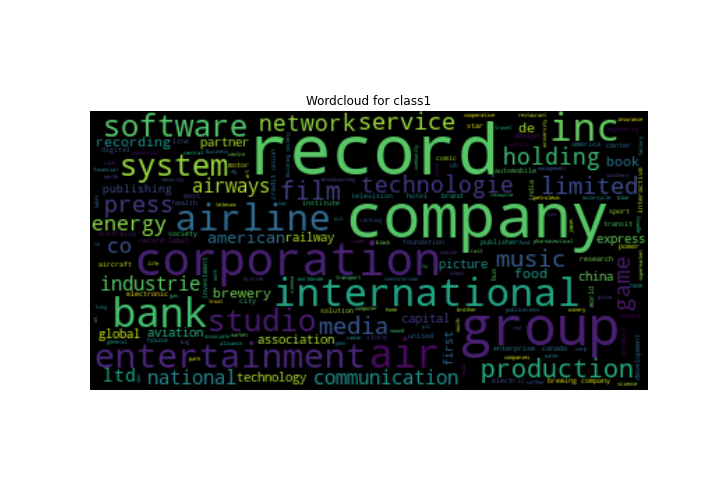

In [85]:
Image(filename='resources/images/Wordcloud-for-class-1.png')

### Educational Institution

In [6]:
df[df["Class"]==2].head(100)

,Class,Name
40000,2,Dubai Gem Private School & Nursery
40001,2,Gateford Park Primary School
40002,2,German Historical Institute in Rome
40003,2,Holy Savior Menard Central High School
40004,2,Adarsh English Boarding School
40005,2,Kresge College
40006,2,University of Ulsan
40007,2,Yanbu University College
40008,2,University of Windsor
40009,2,Thomas Jefferson University


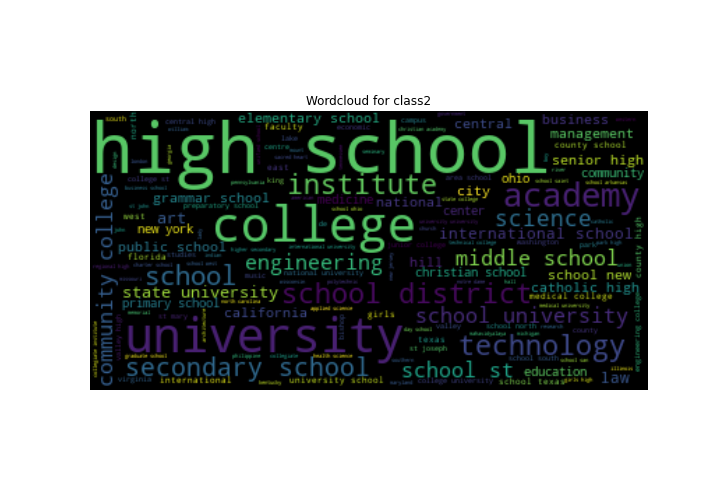

In [87]:
Image(filename='resources/images/Wordcloud-for-class-2.png')

### Artist

In [7]:
df[df["Class"]==3].head(100)

,Class,Name
80000,3,Erin Morgenstern
80001,3,Samta Benyahia
80002,3,Morton Stevens
80003,3,Esfandiar Monfaredzadeh
80004,3,Cao Baoping
80005,3,Charles P. Gruppé
80006,3,Da' T.R.U.T.H.
80007,3,Lorraine McIntosh
80008,3,Elito Circa
80009,3,Will Tanous


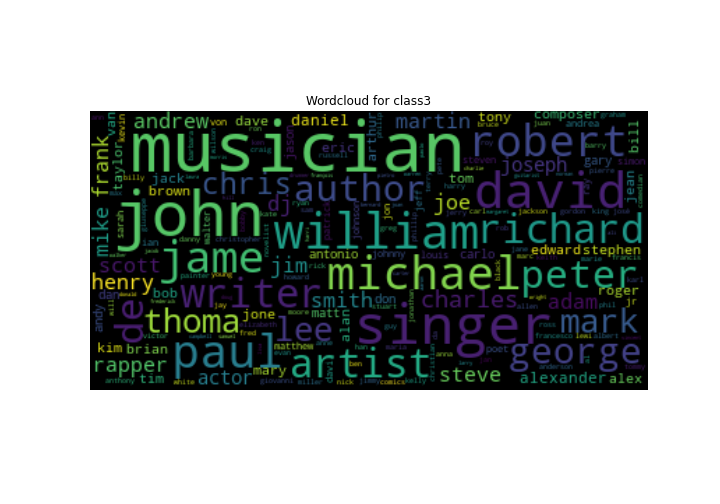

In [88]:
Image(filename='resources/images/Wordcloud-for-class-3.png')

### Athlete

In [8]:
df[df["Class"]==4].head(100)

,Class,Name
120000,4,Martin McKinnon
120001,4,Elena Yakovishina
120002,4,Kazma (wrestler)
120003,4,Aoife Murray
120004,4,Dragan Stojisavljević
120005,4,Hubert Hilti
120006,4,Kevin Landolt
120007,4,Guillaume Boronad
120008,4,Yaniv Azran
120009,4,Ruben Sanadi


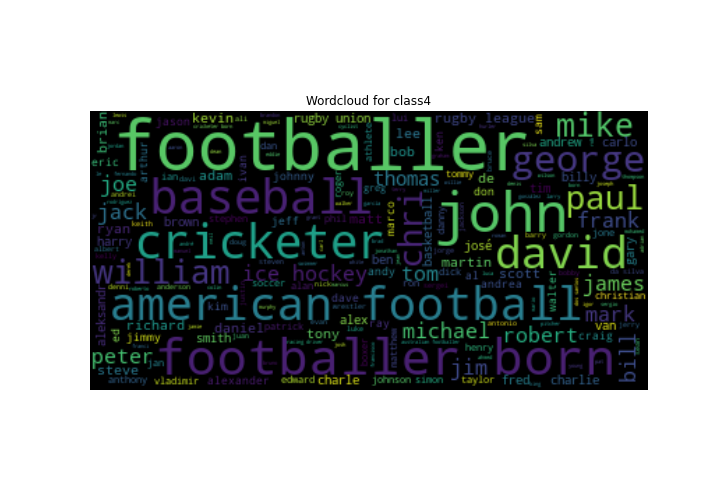

In [89]:
Image(filename='resources/images/Wordcloud-for-class-4.png')

### Office Holder

In [9]:
df[df["Class"]==5].head(100)

,Class,Name
160000,5,Augustus Porter
160001,5,Jack Masters
160002,5,Sayed Abdul Ghafar Sayed Zadah
160003,5,Bhalchandra Yadava
160004,5,T.W. Shannon
160005,5,Jim Ananich
160006,5,Oskar Potiorek
160007,5,Jim Scheer
160008,5,Ijyaraj Singh
160009,5,Jan Helenus Ferguson


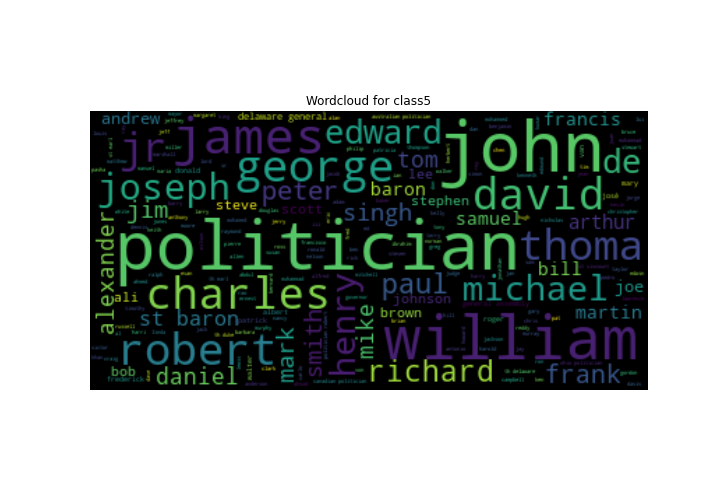

In [90]:
Image(filename='resources/images/Wordcloud-for-class-5.png')

### Mean of Transportation

In [10]:
df[df["Class"]==6].head(100)

,Class,Name
200000,6,Wedell-Williams XP-34
200001,6,USS Springfield (CL-66)
200002,6,USRC Argus
200003,6,Rover 200 / 25
200004,6,HMS E35
200005,6,Alvis Firebird
200006,6,Wright Commander
200007,6,USS Cybele (AKS-10)
200008,6,GWR Ariadne Class
200009,6,Suzuki GSX-R250


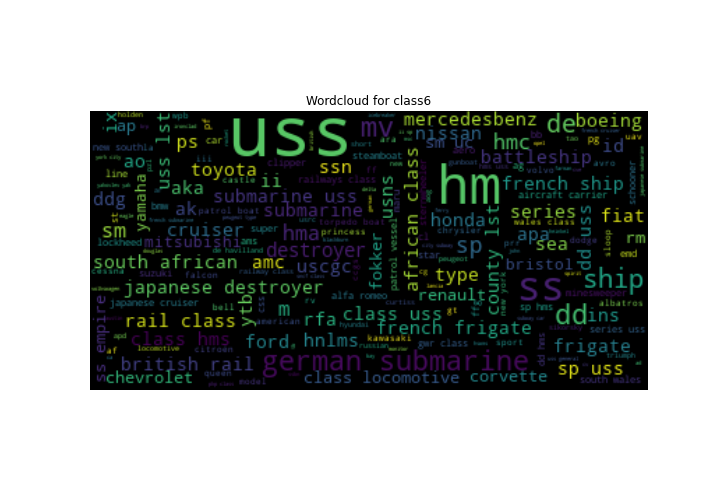

In [91]:
Image(filename='resources/images/Wordcloud-for-class-6.png')

### Building

In [11]:
df[df["Class"]==7].head(100)

,Class,Name
240000,7,Barber-Mulligan Farm
240001,7,Danat Al Emarat Women & Children’s Hospital
240002,7,East Hills Shopping Center
240003,7,First Baptist Church-Lexington
240004,7,Uniontown Mall
240005,7,Forest Road Primitive Methodist Church
240006,7,Orndoff-Cross House
240007,7,Regatta Hotel
240008,7,Lisbon Opera House
240009,7,Manécanterie Lyon


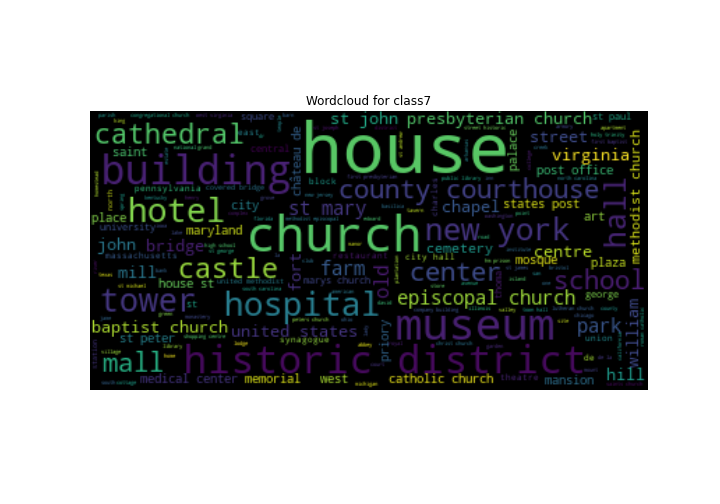

In [92]:
Image(filename='resources/images/Wordcloud-for-class-7.png')

### Natural Place

In [12]:
df[df["Class"]==8].head(100)

,Class,Name
280000,8,Duruitoarea River
280001,8,Mount Jackson (New Hampshire)
280002,8,Anaweka River
280003,8,Oseosan
280004,8,Lago Nero (Bergamo)
280005,8,River Hull
280006,8,Călmuș River
280007,8,Gazivoda Lake
280008,8,Raduha (mountain)
280009,8,Tomnatecu River (Bârnaru)


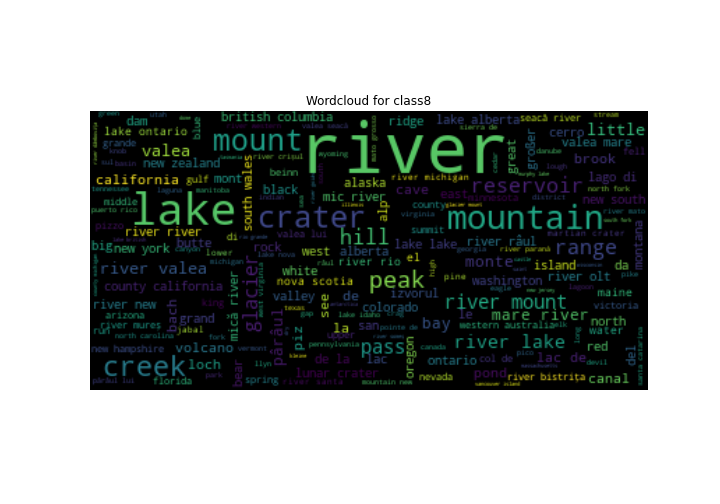

In [93]:
Image(filename='resources/images/Wordcloud-for-class-8.png')

### Village

In [13]:
df[df["Class"]==9].head(100)

,Class,Name
320000,9,Shirvan Shahlu
320001,9,Chayly
320002,9,Gavdar
320003,9,Piskarki
320004,9,Gustawów Gmina Fałków
320005,9,Aliabad-e Avval
320006,9,Yaylapınar Bayburt
320007,9,Tazehabad-e Marivani
320008,9,Nayjuk
320009,9,Jarząbkowice Silesian Voivodeship


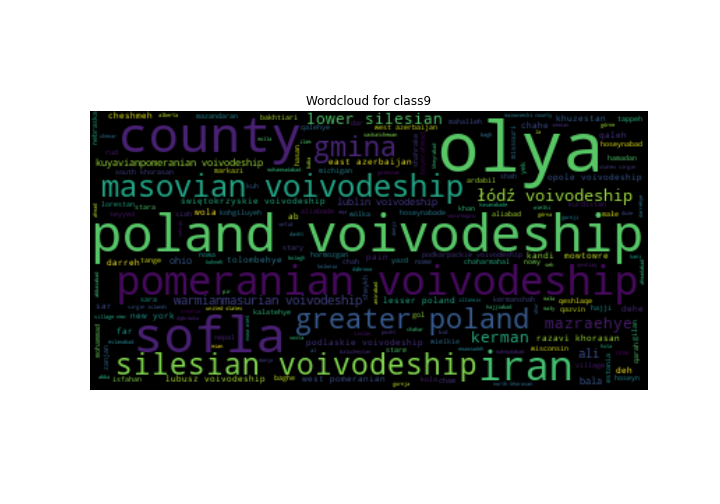

In [94]:
Image(filename='resources/images/Wordcloud-for-class-9.png')

### Animal

In [14]:
df[df["Class"]==10].head(100)

,Class,Name
360000,10,Halaiba
360001,10,Americardia media
360002,10,Stereoplasmoceratidae
360003,10,Thais kiosquiformis
360004,10,Sphaenothecus picticornis
360005,10,Faronta
360006,10,Eriostepta sanguinea
360007,10,Chryseofusus
360008,10,Batrachedra libator
360009,10,Scopula calotis


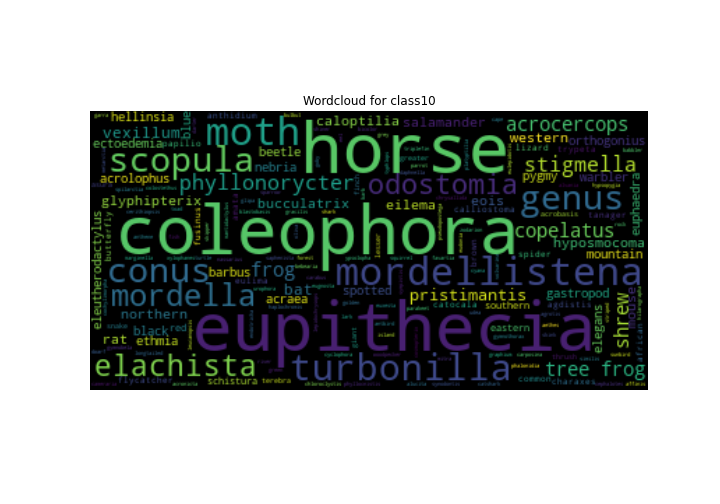

In [95]:
Image(filename='resources/images/Wordcloud-for-class-10.png')

### Plant

In [15]:
df[df["Class"]==11].head(100)

,Class,Name
400000,11,Utricularia simulans
400001,11,Carex sparganioides
400002,11,Salvadora oleiodes
400003,11,Cyrtandra cleopatrae
400004,11,Nectandra matogrossensis
400005,11,Azara serrata
400006,11,Vitis popenoei
400007,11,Aechmea subg. Lamprococcus
400008,11,Bartramia pomiformis
400009,11,Doryopteris angelica


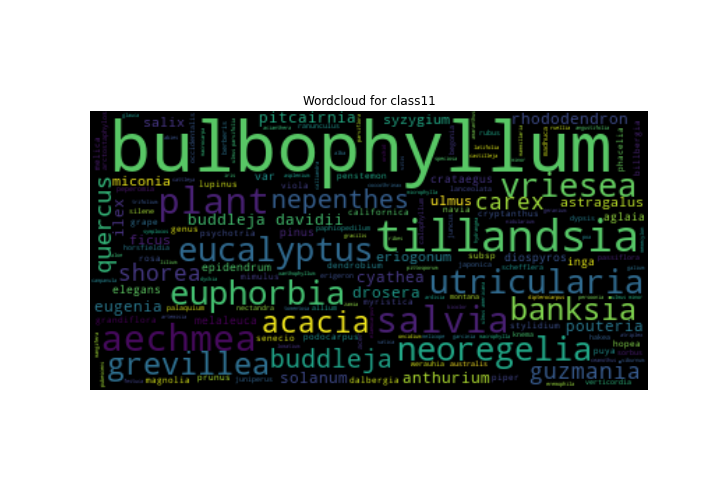

In [96]:
Image(filename='resources/images/Wordcloud-for-class-11.png')

### Album

In [16]:
df[df["Class"]==12].head(100)

,Class,Name
440000,12,La Sept (album)
440001,12,Epikindyna Paihnidia
440002,12,Thug Thisle
440003,12,Chapter VI (album)
440004,12,Untilted
440005,12,The Iron Stone
440006,12,Da Drought 3
440007,12,En spjutkastares visor
440008,12,Boombastic
440009,12,A Different Shade


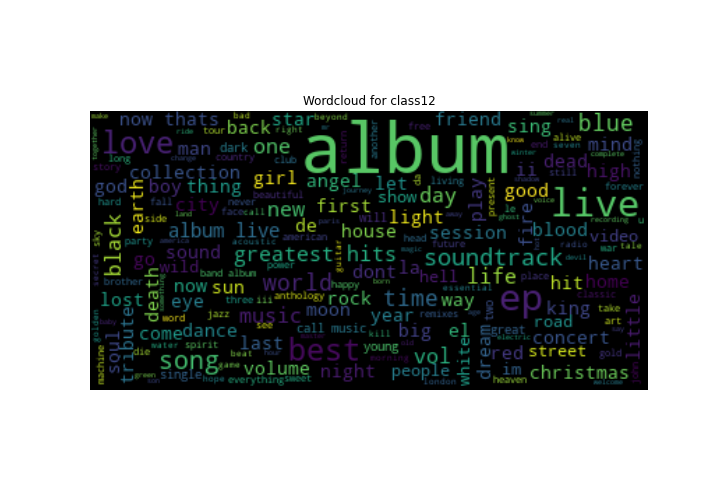

In [97]:
Image(filename='resources/images/Wordcloud-for-class-12.png')

### Film

In [17]:
df[df["Class"]==13].head(100)

,Class,Name
480000,13,The Nuisance (1933 film)
480001,13,Le mataf
480002,13,The Long Way Home (2013 film)
480003,13,Ghetto Stories (film)
480004,13,In the Alleys of Love
480005,13,Pathreela Raasta
480006,13,Ponirah Terpidana
480007,13,The Whole Truth (1923 film)
480008,13,Tabloid (film)
480009,13,Hissatsu: Sure Death


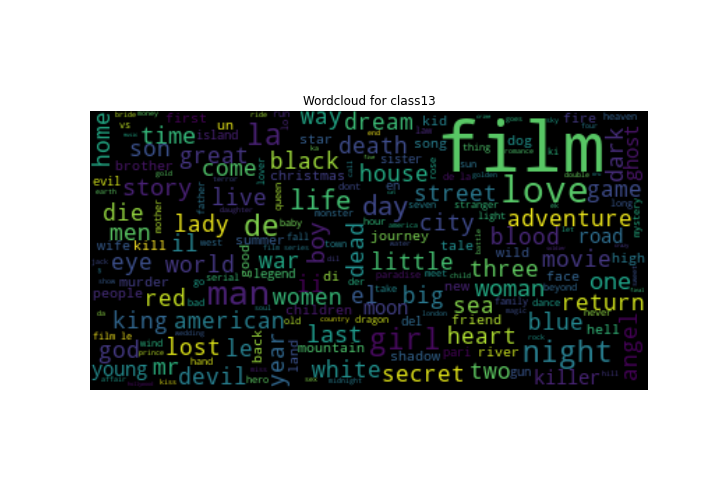

In [98]:
Image(filename='resources/images/Wordcloud-for-class-13.png')

### Written Work

In [18]:
df[df["Class"]==14].head(100)

,Class,Name
520000,14,Kaiketsu Zorori
520001,14,How to Live (biography)
520002,14,I Can Do Bad All by Myself (play)
520003,14,The Tree Butcher
520004,14,The First Sir Percy
520005,14,Dieu
520006,14,Samtiden
520007,14,Yakitate!! Japan
520008,14,Everybody Loves a Good Drought
520009,14,Feminism Unmodified


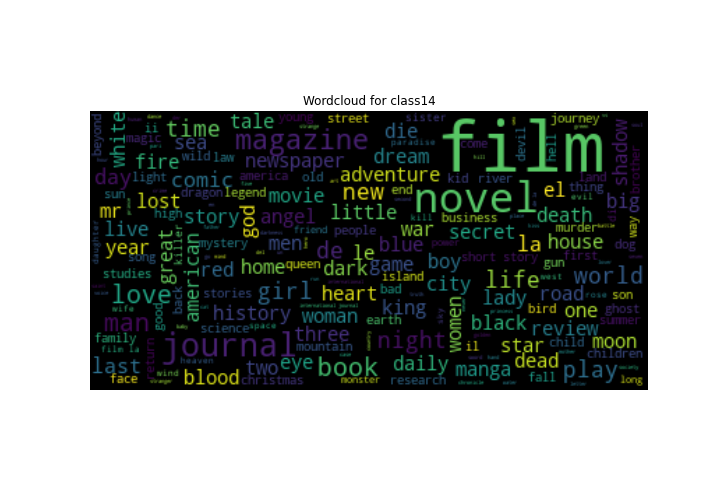

In [99]:
Image(filename='resources/images/Wordcloud-for-class-14.png')